# 6.6: Sourcing & Analyzing Time Series Data

Imoprting the libraries

In [524]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')

In [525]:
#creating the path
path = r'C:\Users\graha\Desktop\Career foundry\Chapter 6\Wind Turbine Scada\02 Data\Prepared Data'

In [526]:
df_gwt = pd.read_csv(os.path.join(path, 'German_wind_turbines_cleaned.csv'))

In [527]:
df_gwt.head()

,Country,State,District,Postal Code,location,Longitude,Latitude,Commissioning Date,Unit Operation Status,Gross Performance,...,Technology,Type Design,Hub Height,Rotor Diameter,Planned Commissioning Dtae,Sea Location,ClusterNordsee,Water Depth,Distance From Coastline,ClusterOstsee
0,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.739374,51.270068,9/1/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
1,Deutschland,Schleswig-Holstein,Segeberg,23824.0,Damsdorf,10.299400,54.073831,9/28/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,135.40,115.70,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.733069,51.272164,9/4/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
3,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.748361,51.270462,8/31/2017,In Betrieb,3000.0,...,Horizontalläufer,E-115,149.08,115.71,NaN,NaN,NaN,NaN,NaN,NaN
4,Deutschland,Nordrhein-Westfalen,Heinsberg,52525.0,Heinsberg,6.045546,51.029548,1/11/2017,In Betrieb,2400.0,...,Horizontalläufer,N117,120.00,116.80,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
df_gwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     34484 non-null  object 
 1   State                       34484 non-null  object 
 2   District                    32700 non-null  object 
 3   Postal Code                 32700 non-null  float64
 4   location                    32700 non-null  object 
 5   Longitude                   33589 non-null  float64
 6   Latitude                    33589 non-null  float64
 7   Commissioning Date          32020 non-null  object 
 8   Unit Operation Status       34484 non-null  object 
 9   Gross Performance           34484 non-null  float64
 10  Net Rated Power             34484 non-null  float64
 11  Name of Windpark            33674 non-null  object 
 12  Position                    34484 non-null  object 
 13  Manufacturer                340

In [529]:
df_gwt.isnull().sum()

Country                           0
State                             0
District                       1784
Postal Code                    1784
location                       1784
Longitude                       895
Latitude                        895
Commissioning Date             2464
Unit Operation Status             0
Gross Performance                 0
Net Rated Power                   0
Name of Windpark                810
Position                          0
Manufacturer                    449
Technology                        0
Type Design                     464
Hub Height                      853
Rotor Diameter                  453
Planned Commissioning Dtae    32021
Sea Location                  32700
ClusterNordsee                33008
Water Depth                   32834
Distance From Coastline       32834
ClusterOstsee                 34176
dtype: int64

In [530]:
df_gwt.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34479    False
34480    False
34481    False
34482    False
34483    False
Length: 34484, dtype: bool

In [531]:
df_gwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     34484 non-null  object 
 1   State                       34484 non-null  object 
 2   District                    32700 non-null  object 
 3   Postal Code                 32700 non-null  float64
 4   location                    32700 non-null  object 
 5   Longitude                   33589 non-null  float64
 6   Latitude                    33589 non-null  float64
 7   Commissioning Date          32020 non-null  object 
 8   Unit Operation Status       34484 non-null  object 
 9   Gross Performance           34484 non-null  float64
 10  Net Rated Power             34484 non-null  float64
 11  Name of Windpark            33674 non-null  object 
 12  Position                    34484 non-null  object 
 13  Manufacturer                340

## Data Cleaning and Wrangling

### Gross Performance / Sum (Monthly Grouping)

In [532]:
# Convert 'Commissioning Date' to datetime
df_gwt['Commissioning Date'] = pd.to_datetime(df_gwt['Commissioning Date'], errors='coerce')

# Filter the DataFrame to include only records starting from 1990
df_gwt = df_gwt[df_gwt['Commissioning Date'].dt.year >= 1990]

# Check for any null values in 'Commissioning Date' after conversion
print(df_gwt['Commissioning Date'].isnull().sum())

# Assuming you want to sum the 'Gross Performance' column by month, create a new DataFrame
# Group by month and sum the 'Gross Performance' column
df_mgp = df_gwt.resample('M', on='Commissioning Date')['Gross Performance'].sum().reset_index(name='Total Gross Performance')

# Showing the first few rows of the monthly data with total gross performance
print(df_mgp.head())


0
  Commissioning Date  Total Gross Performance
0         1990-01-31                     75.0
1         1990-02-28                      0.0
2         1990-03-31                      0.0
3         1990-04-30                      0.0
4         1990-05-31                    300.0


In [533]:
df_mgp.set_index('Commissioning Date', inplace=True)

In [534]:
print(df_mgp.index)

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Commissioning Date', length=401, freq=None)


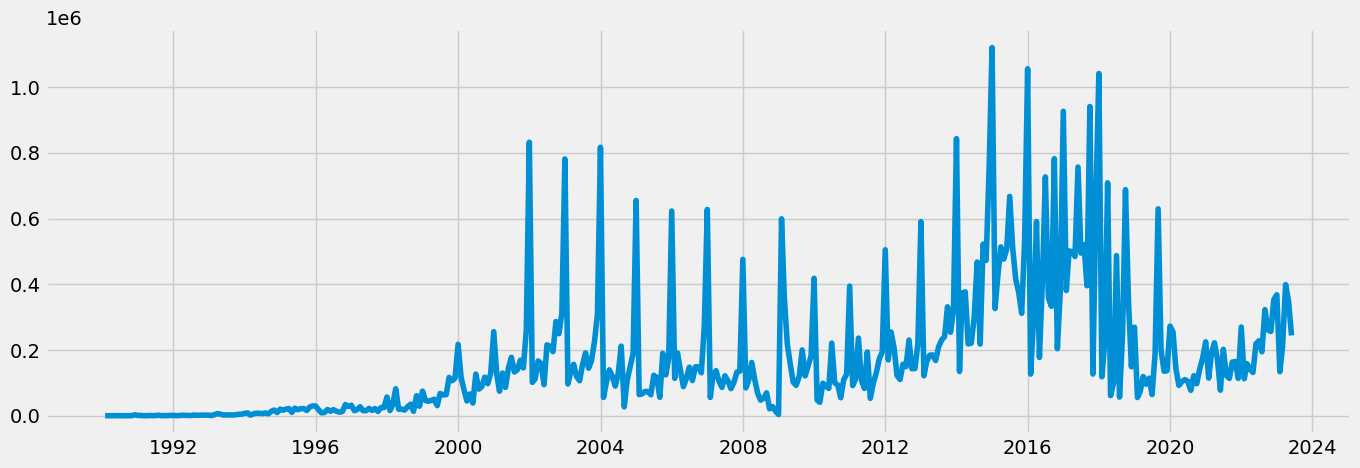

In [535]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mgp)

### Hub Height / Native Dates (No Grouping)

In [536]:
# Convert 'Commissioning Date' to datetime
df_gwt['Commissioning Date'] = pd.to_datetime(df_gwt['Commissioning Date'], errors='coerce')

# Drop rows with missing values in 'Hub Height'
df_gwt.dropna(subset=['Hub Height'], inplace=True)

# Filter the DataFrame to include only records starting from 1990
df_gwt = df_gwt[df_gwt['Commissioning Date'].dt.year >= 1990]

# Group by month and keep the native 'Hub Height' values
df_mhh = df_gwt.resample('M', on='Commissioning Date')['Hub Height'].first().reset_index(name='Native Hub Height')

# Drop rows with missing values in the native hub height column
df_mhh.dropna(subset=['Native Hub Height'], inplace=True)

# Showing the first few rows of the monthly data with native hub height
print(df_mhh.head())

  Commissioning Date  Native Hub Height
0         1990-05-31               30.0
3         1990-08-31               30.0
4         1990-09-30               24.0
5         1990-10-31               32.5
6         1990-11-30               28.7


In [537]:
df_mhh.set_index('Commissioning Date', inplace=True)

In [538]:
print(df_mhh.index)

DatetimeIndex(['1990-05-31', '1990-08-31', '1990-09-30', '1990-10-31',
               '1990-11-30', '1990-12-31', '1991-01-31', '1991-02-28',
               '1991-03-31', '1991-04-30',
               ...
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Commissioning Date', length=395, freq=None)


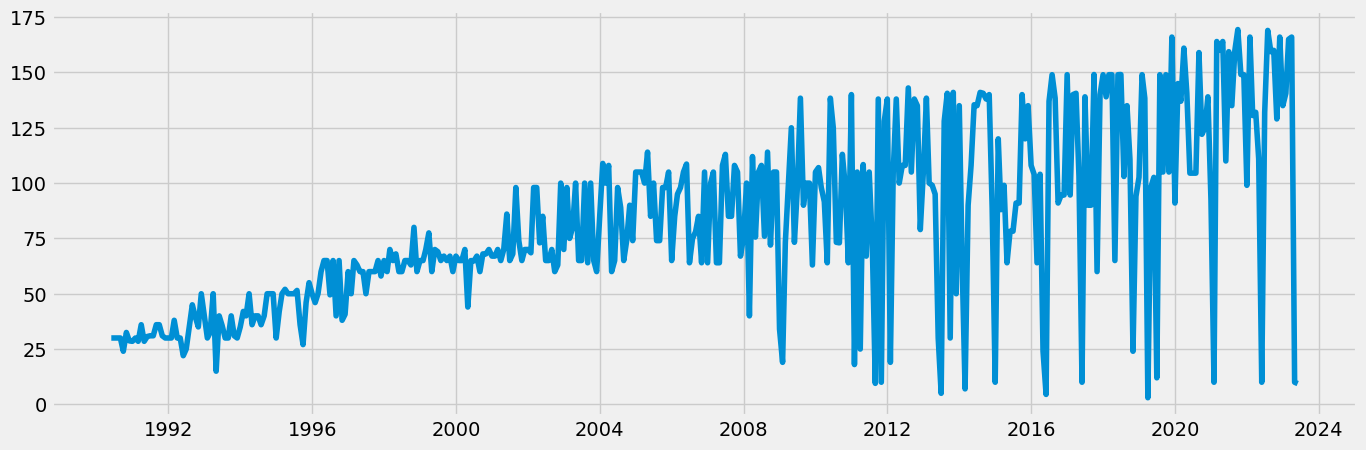

In [539]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mhh)

### Rotor Diameter / Mean (Monthly Grouping)

In [540]:
# Convert 'Commissioning Date' to datetime
df_gwt['Commissioning Date'] = pd.to_datetime(df_gwt['Commissioning Date'], errors='coerce')

# Drop rows with missing values in 'Rotor Diameter'
df_gwt.dropna(subset=['Rotor Diameter'], inplace=True)

# Filter the DataFrame to include only records starting from 1990
df_gwt = df_gwt[df_gwt['Commissioning Date'].dt.year >= 1990]

# Group by month and calculate the mean of the 'Rotor Diameter' column
df_mrd = df_gwt.resample('M', on='Commissioning Date')['Rotor Diameter'].mean().reset_index(name='Mean Rotor Diameter')

# Showing the first few rows of the monthly data with the mean rotor diameter
print(df_mrd.head())

  Commissioning Date  Mean Rotor Diameter
0         1990-05-31                 24.0
1         1990-06-30                  NaN
2         1990-07-31                  NaN
3         1990-08-31                 22.0
4         1990-09-30                 15.0


In [541]:
df_mrd.set_index('Commissioning Date', inplace=True)

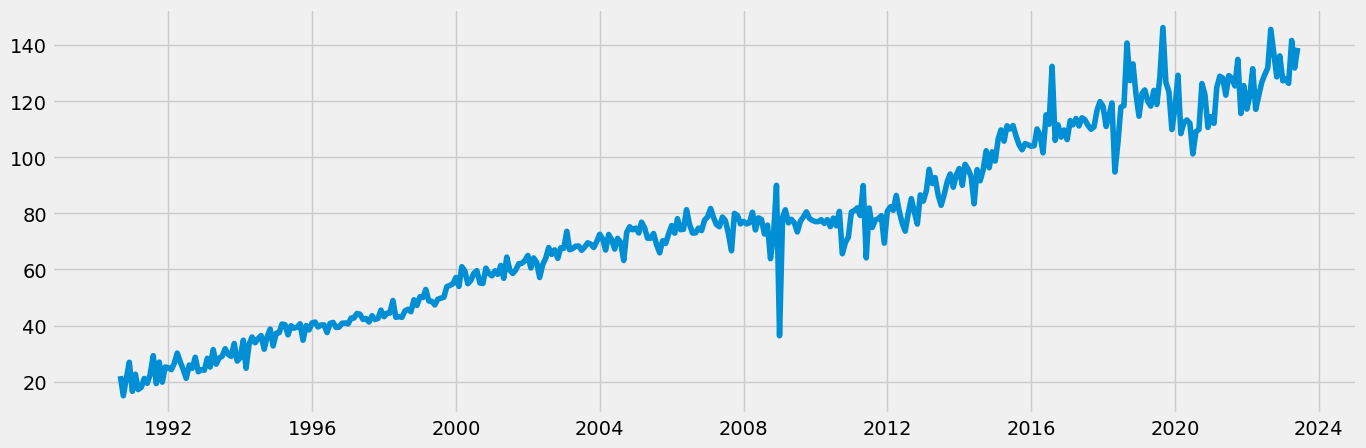

In [542]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mrd)

# Time-series analysis: decomposition

## Gross Performance / Sum (Monthly Grouping)

#### Additive Decomposition

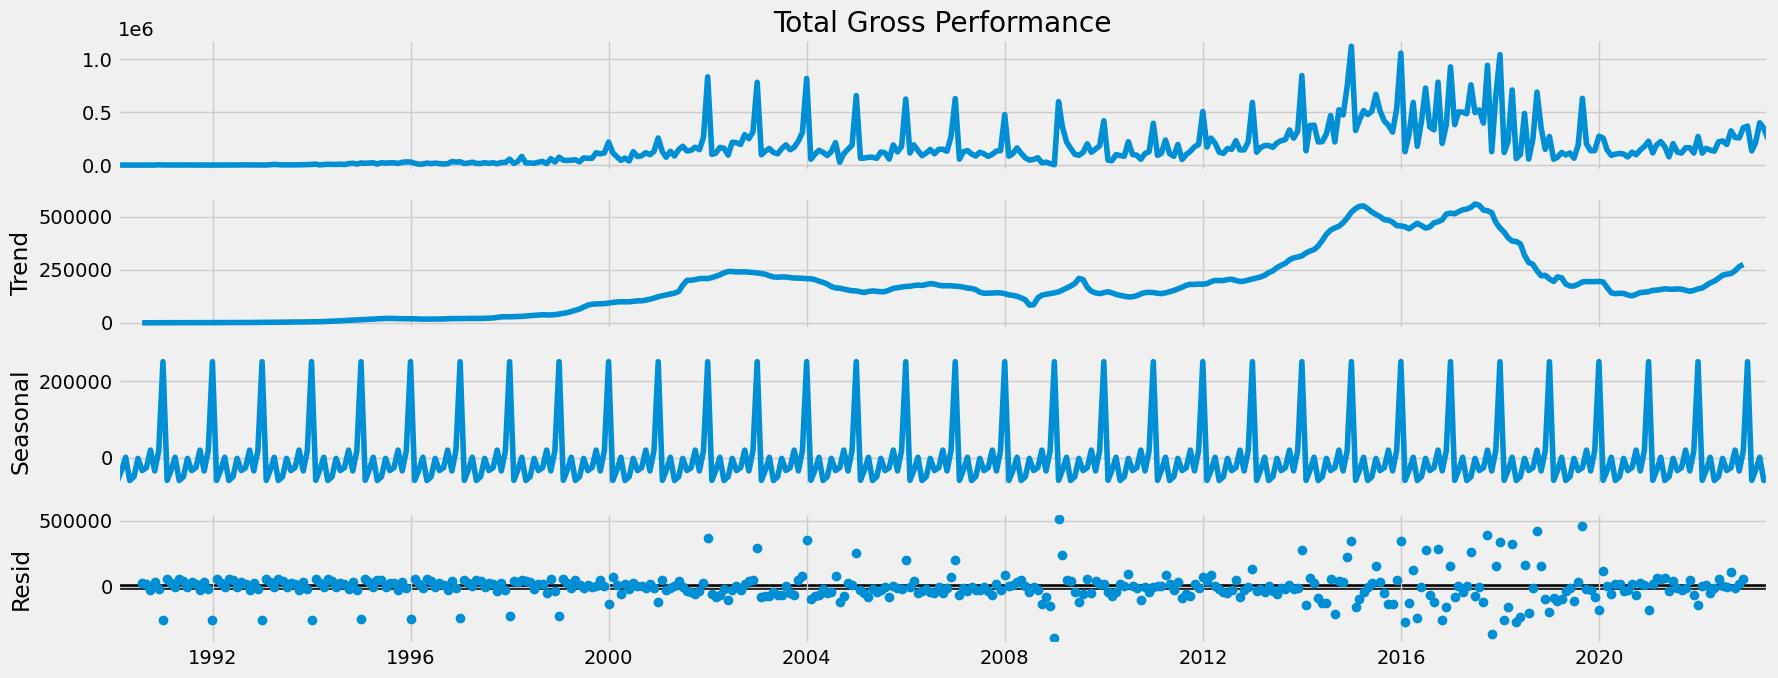

In [543]:
# Perform the decomposition
decomposition = sm.tsa.seasonal_decompose(df_mgp['Total Gross Performance'], model='additive', period=12)

from pylab import rcParams  # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

#### Multiplicateive Decomposition

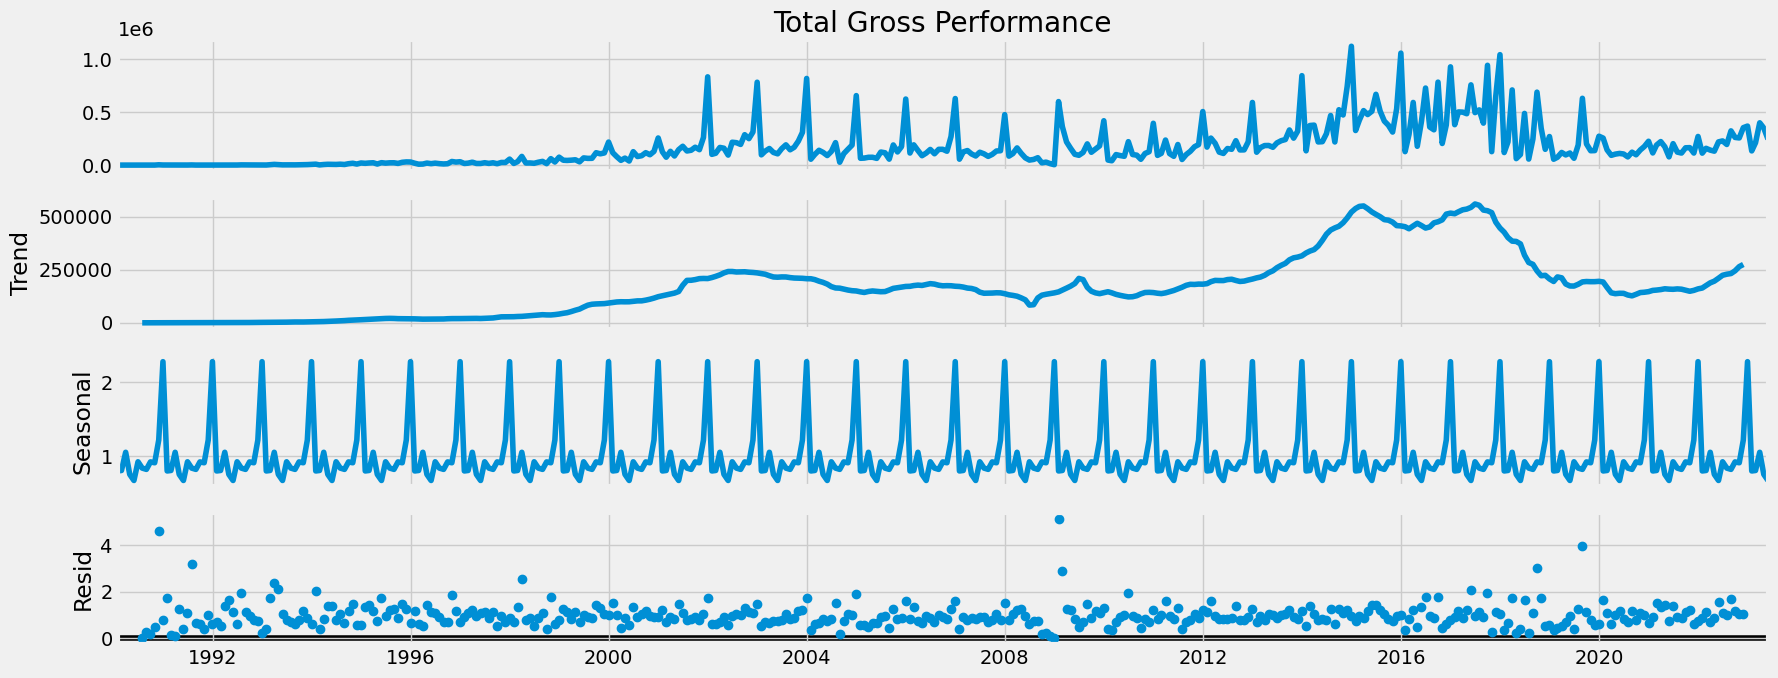

In [544]:
# Ensure all values in 'Total Gross Performance' are positive by adding a small constant
df_mgp['Total Gross Performance'] = df_mgp['Total Gross Performance'] + 0.001

# Import the necessary module for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the figure size for plotting
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Perform the decomposition with a multiplicative model, assuming monthly data and looking for yearly seasonality
decomposition = sm.tsa.seasonal_decompose(df_mgp['Total Gross Performance'], model='multiplicative', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()

### Observations

From the graphs we can see that there have been rises and falls in the increase in Gross Performance, there was a general increase up to 2016 and a plateau to 2018 where there has been a large decrease. It looks like it is going to start picking up again.

## Stationarizing the Dataframe

In [545]:
from statsmodels.tsa.stattools import adfuller  # Import the adfuller() function

def dickey_fuller(timeseries):  # Define the function
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the 'Total Gross Performance' time series
dickey_fuller(df_mgp['Total Gross Performance'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.776512
p-value                          0.392184
Number of Lags Used             15.000000
Number of Observations Used    385.000000
Critical Value (1%)             -3.447450
Critical Value (5%)             -2.869077
Critical Value (10%)            -2.570785
dtype: float64


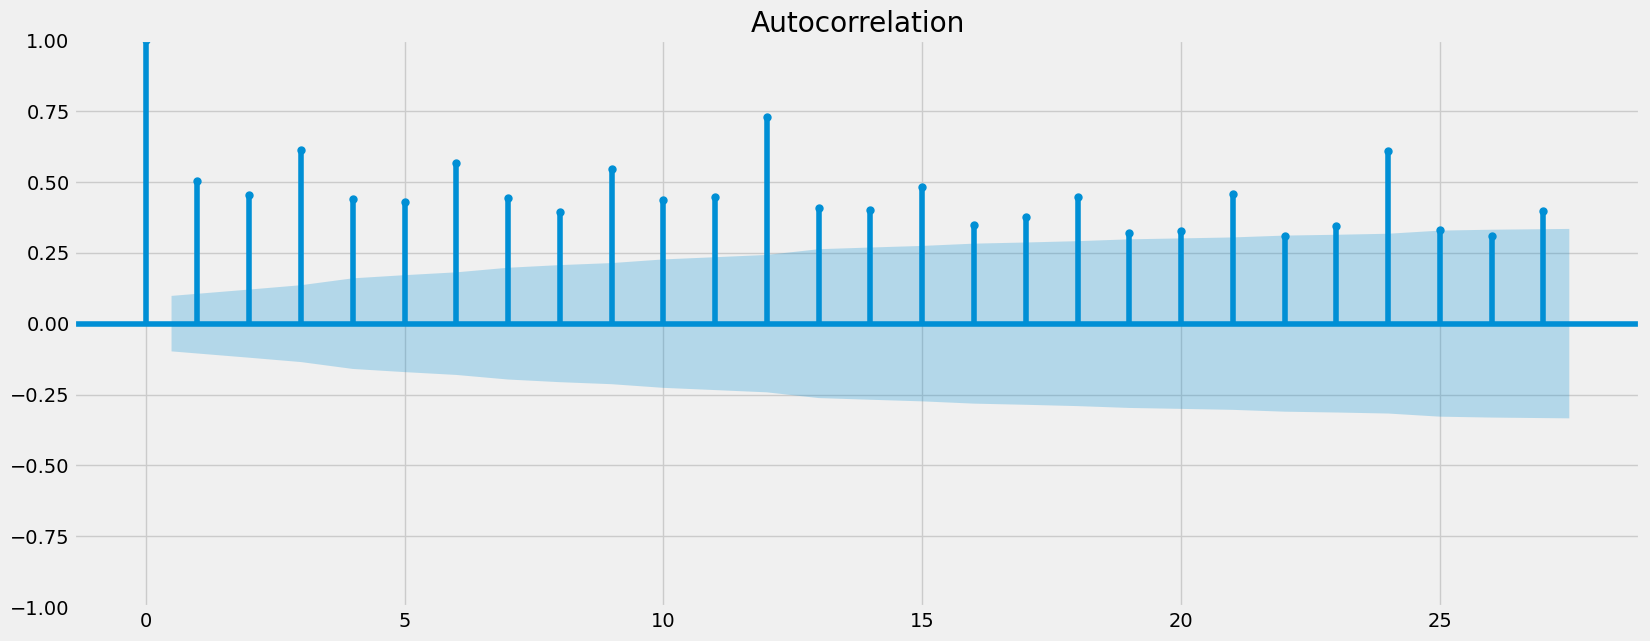

In [546]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_mgp['Total Gross Performance'])
plt.show()

In [547]:
# Make the time series stationary (e.g., take the first difference)
df_mgp['Total Gross Performance_diff'] = df_mgp['Total Gross Performance'].diff()

In [548]:
df_mgp.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [549]:
df_mgp.head()

,Total Gross Performance,Total Gross Performance_diff
Commissioning Date,,
1990-02-28,0.001,-75.0
1990-03-31,0.001,0.0
1990-04-30,0.001,0.0
1990-05-31,300.001,300.0
1990-06-30,0.001,-300.0


In [550]:
df_mgp.columns

Index(['Total Gross Performance', 'Total Gross Performance_diff'], dtype='object')

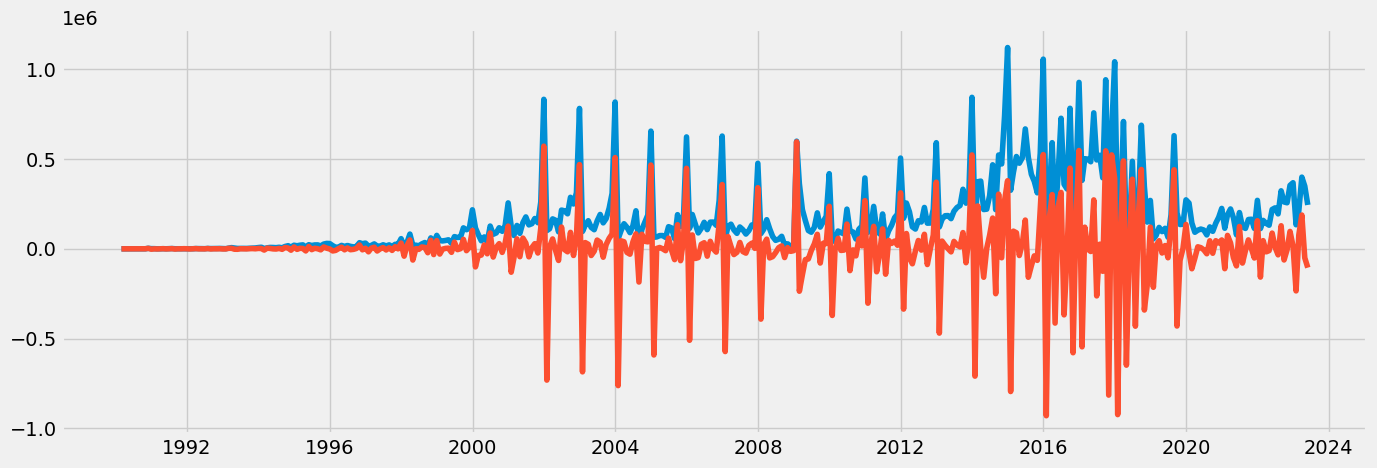

In [551]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mgp)

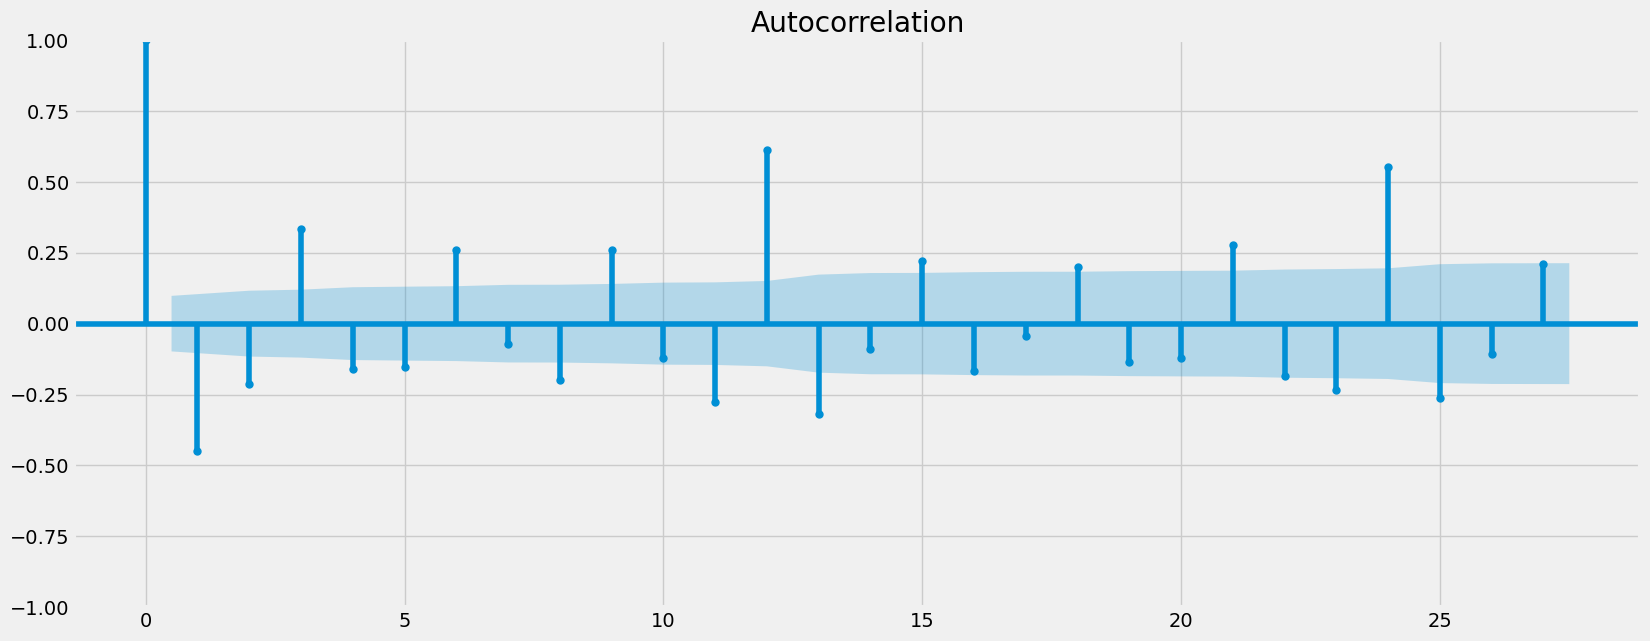

In [552]:
plot_acf(df_mgp['Total Gross Performance_diff'])
plt.show()

In [553]:
# Take the first difference of the data
df_mgp['Total Gross Performance_diff'] = df_mgp['Total Gross Performance'] - df_mgp['Total Gross Performance'].shift(1)

### Observations

Dicky-Fuller test

This is the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. The null hypothesis of the test is that the time series is non-stationary. Typically, if the p-value is less than a chosen significance level (such as 0.05), you reject the null hypothesis and conclude that the time series is stationary. In this case, the p-value is approximately 0.392184, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is insufficient evidence to conclude that the time series is stationary.

Autocorrelation 

-   First test, The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means the lags are significantly correlated with each other. We have many lags beyond this interval, and can deduce that this data is non-stationary.
-   Second test, The autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test saying that data is stationary, that stationarity is weak.



# Hub Height / Native Dates (No Grouping)

#### Additive Decomposition

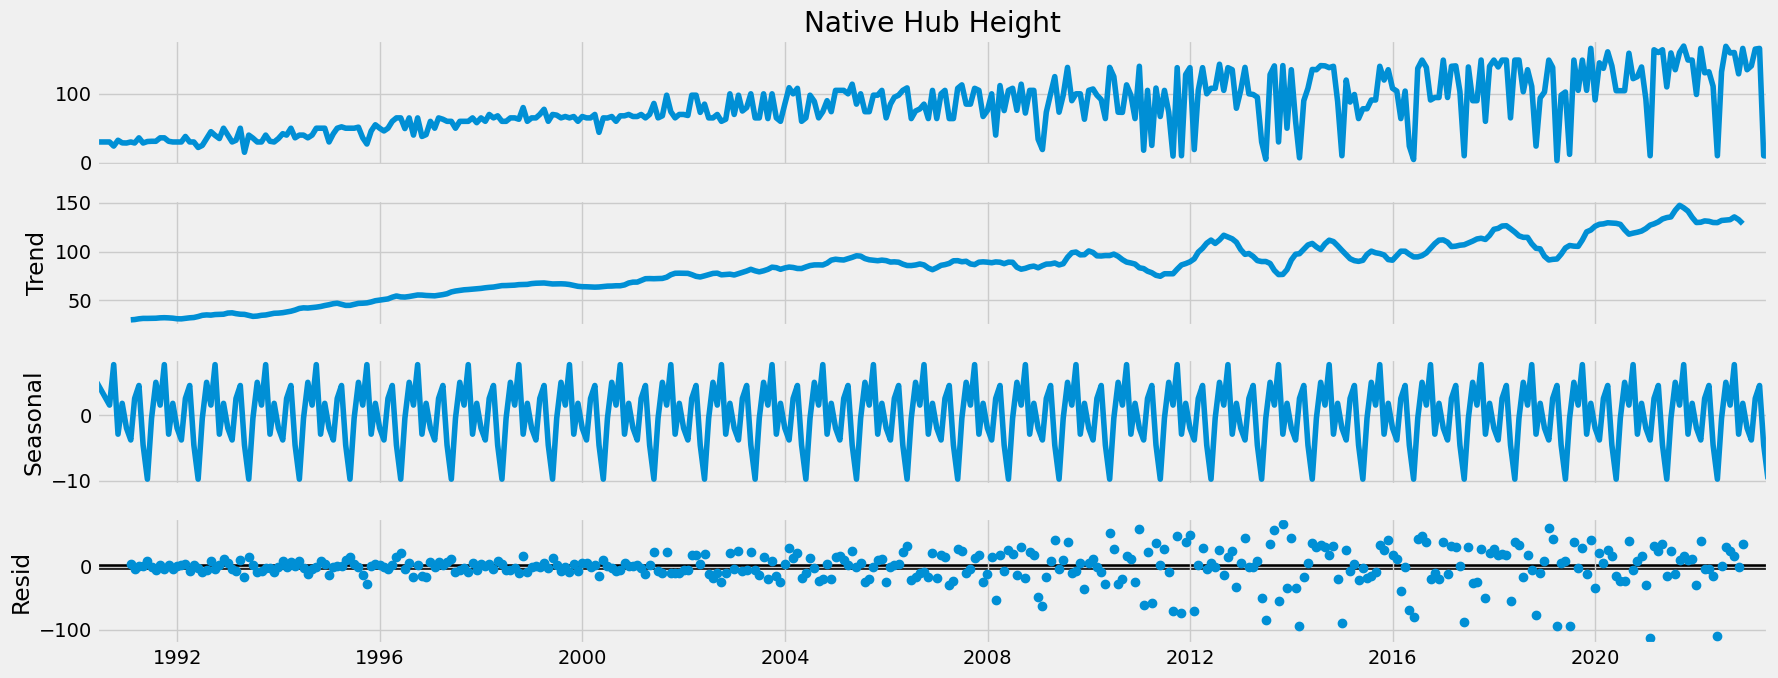

In [554]:
# Perform the decomposition
decomposition_mhh = sm.tsa.seasonal_decompose(df_mhh['Native Hub Height'], model='additive', period=12)

# Set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition_mhh.plot()
plt.show()

#### Multiplicateive Decomposition

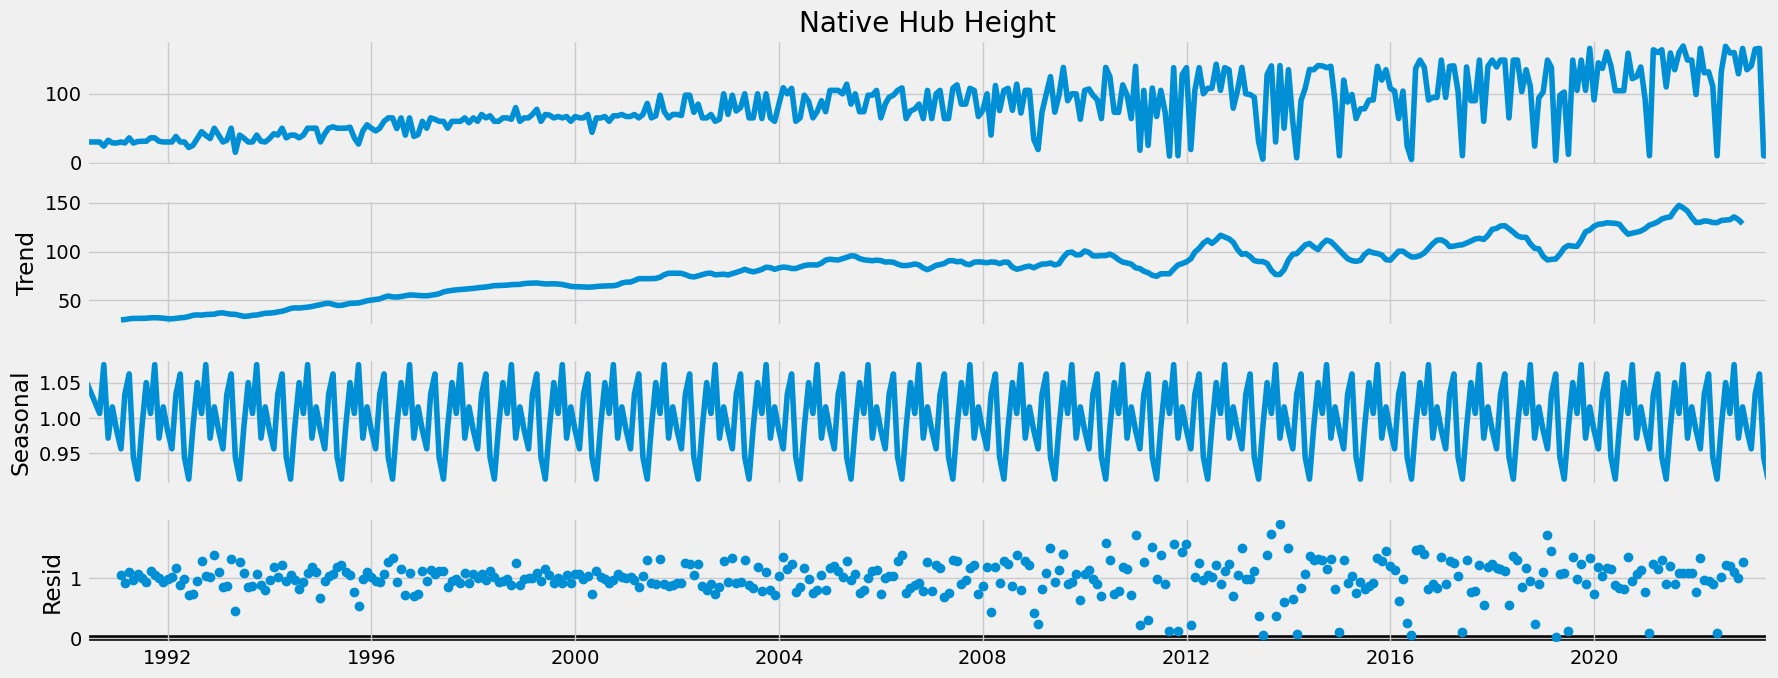

In [555]:
# Ensure all values in 'Native Hub Height' are positive by adding a small constant
df_mhh['Native Hub Height'] = df_mhh['Native Hub Height'] + 0.001

# Import the necessary module for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the figure size for plotting
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Perform the decomposition with a multiplicative model, assuming monthly data and looking for yearly seasonality
decomposition = sm.tsa.seasonal_decompose(df_mhh['Native Hub Height'], model='multiplicative', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()

### Observations

we can see that over time the general trend is towards a larger hub Height, this makes sense as turbines have only increase in size over the years. the number of turbines being built over the years has also increaased.

## Stationarizing the Dataframe

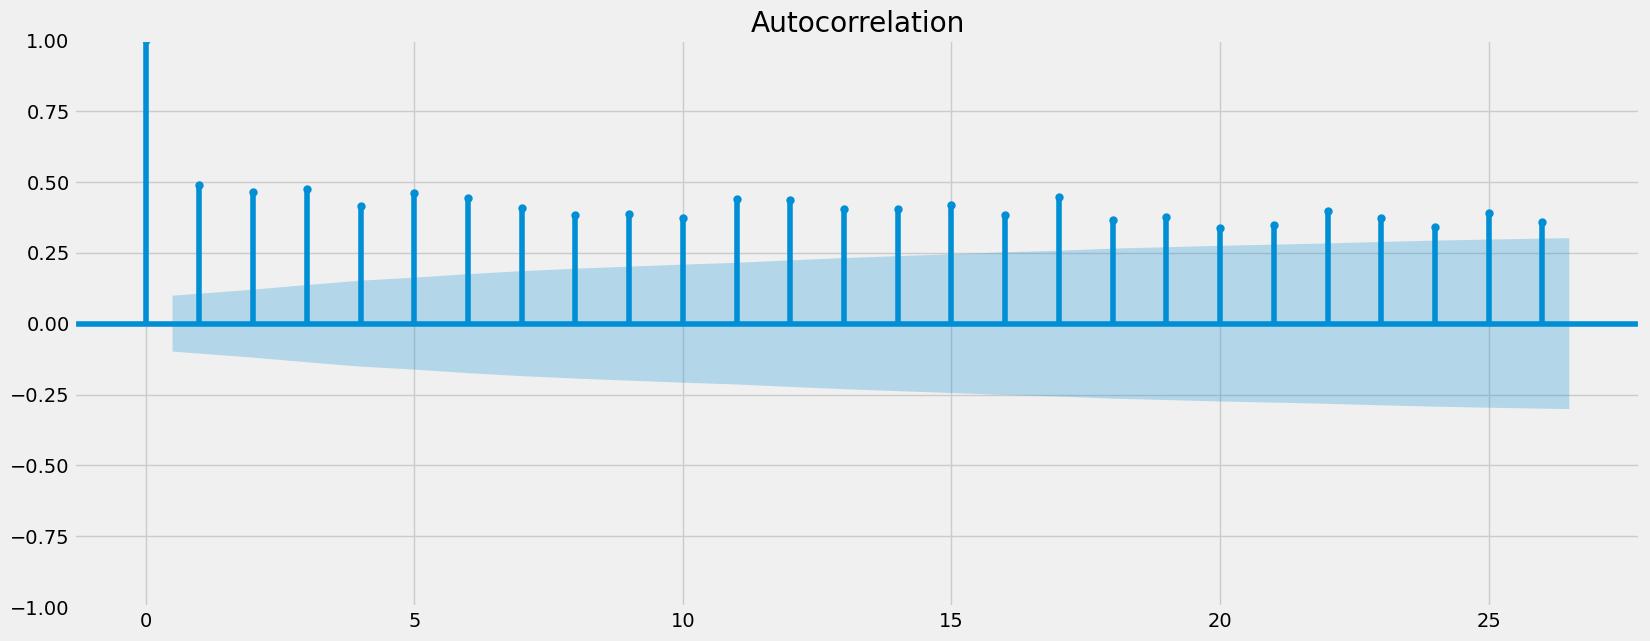

In [556]:
plot_acf(df_mhh['Native Hub Height'])
plt.show()

In [557]:
# Make the time series stationary by taking the first difference
df_mhh['Native Hub Height_diff'] = df_mhh['Native Hub Height'].diff()

In [558]:
df_mhh.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [559]:
# Define the Dickey-Fuller function
def dickey_fuller_hub_height(timeseries):
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the 'Total Hub Height' time series
dickey_fuller_hub_height(df_mhh['Native Hub Height'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.598168
p-value                          0.484514
Number of Lags Used             16.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


In [560]:
df_mhh.head()

,Native Hub Height,Native Hub Height_diff
Commissioning Date,,
1990-08-31,30.001,0.0
1990-09-30,24.001,-6.0
1990-10-31,32.501,8.5
1990-11-30,28.701,-3.8
1990-12-31,28.501,-0.2


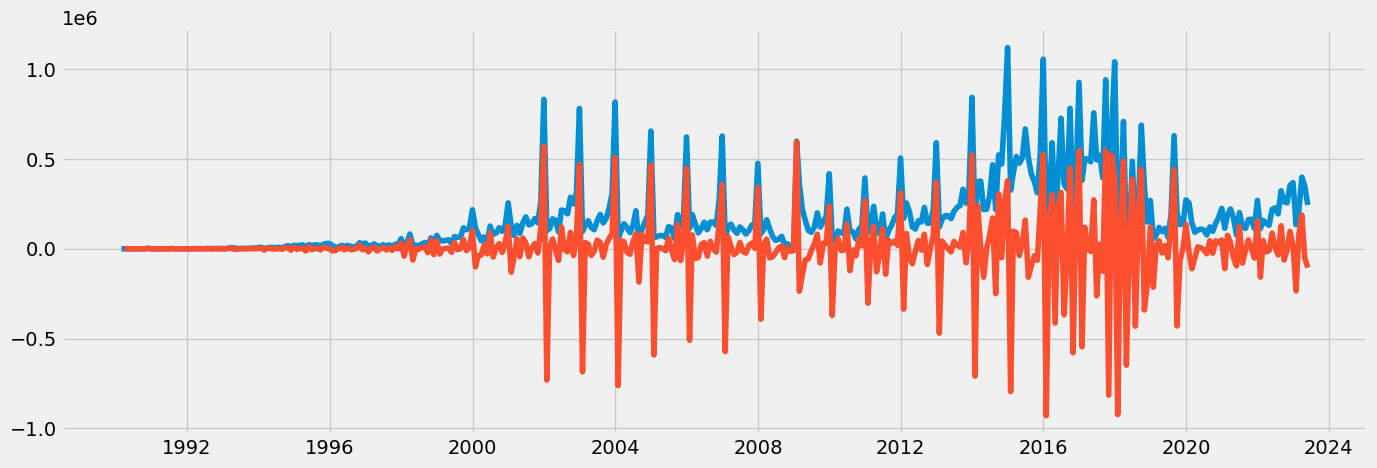

In [561]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mgp)

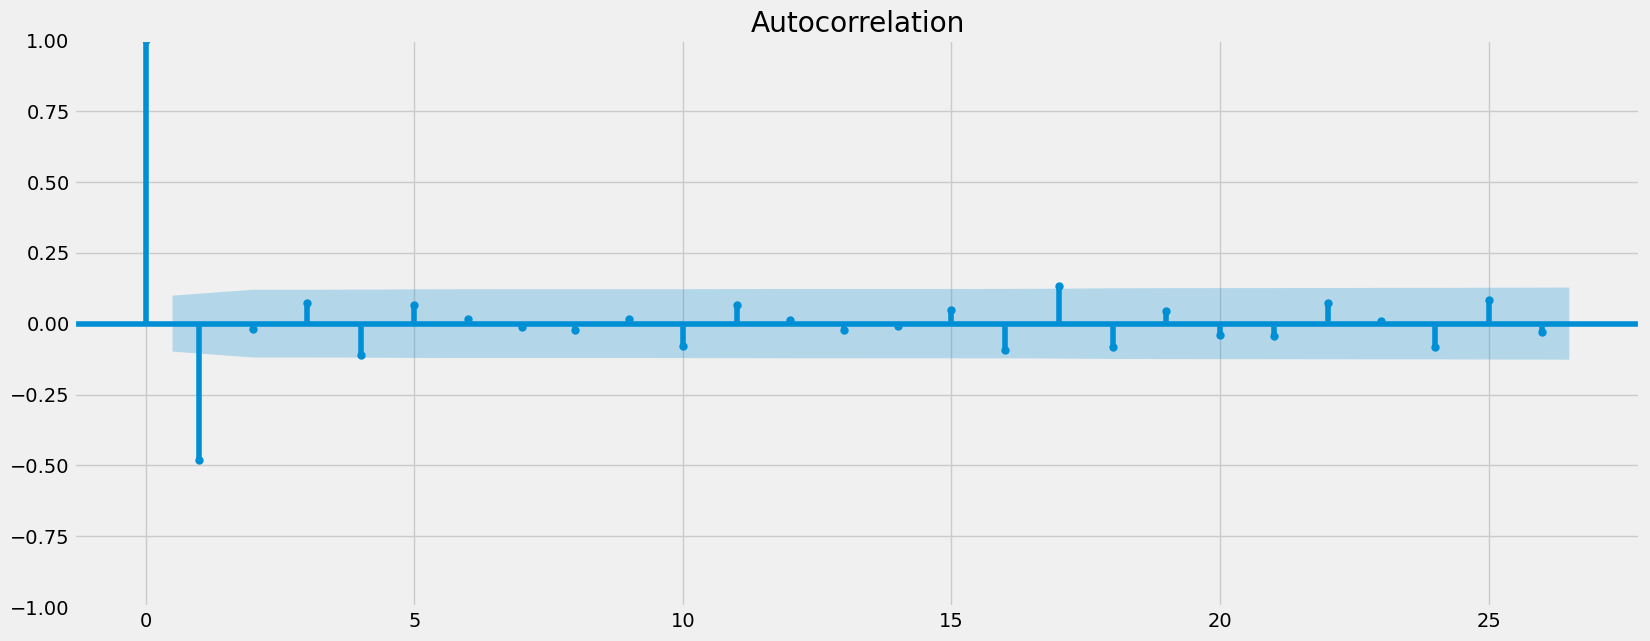

In [562]:
plot_acf(df_mhh['Native Hub Height_diff'])
plt.show()

### Observations

Dicky-Fuller test

This is the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. The null hypothesis of the test is that the time series is non-stationary. Typically, if the p-value is less than a chosen significance level (such as 0.05), you reject the null hypothesis and conclude that the time series is stationary. In this case, the p-value is approximately 0.392184, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is insufficient evidence to conclude that the time series is stationary.

Autocorrelation

-   First test, The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means the lags are significantly correlated with each other. We have many lags beyond this interval, and can deduce that this data is non-stationary.
-   Second test, thhings have improved alot here, it’s still not perfect. This means that, despite the Dickey-Fuller test saying that data is stationary, that stationarity is more acceptable but still week.

# Rotor Diameter / Mean (Monthly Grouping)

#### Additive Decomposition

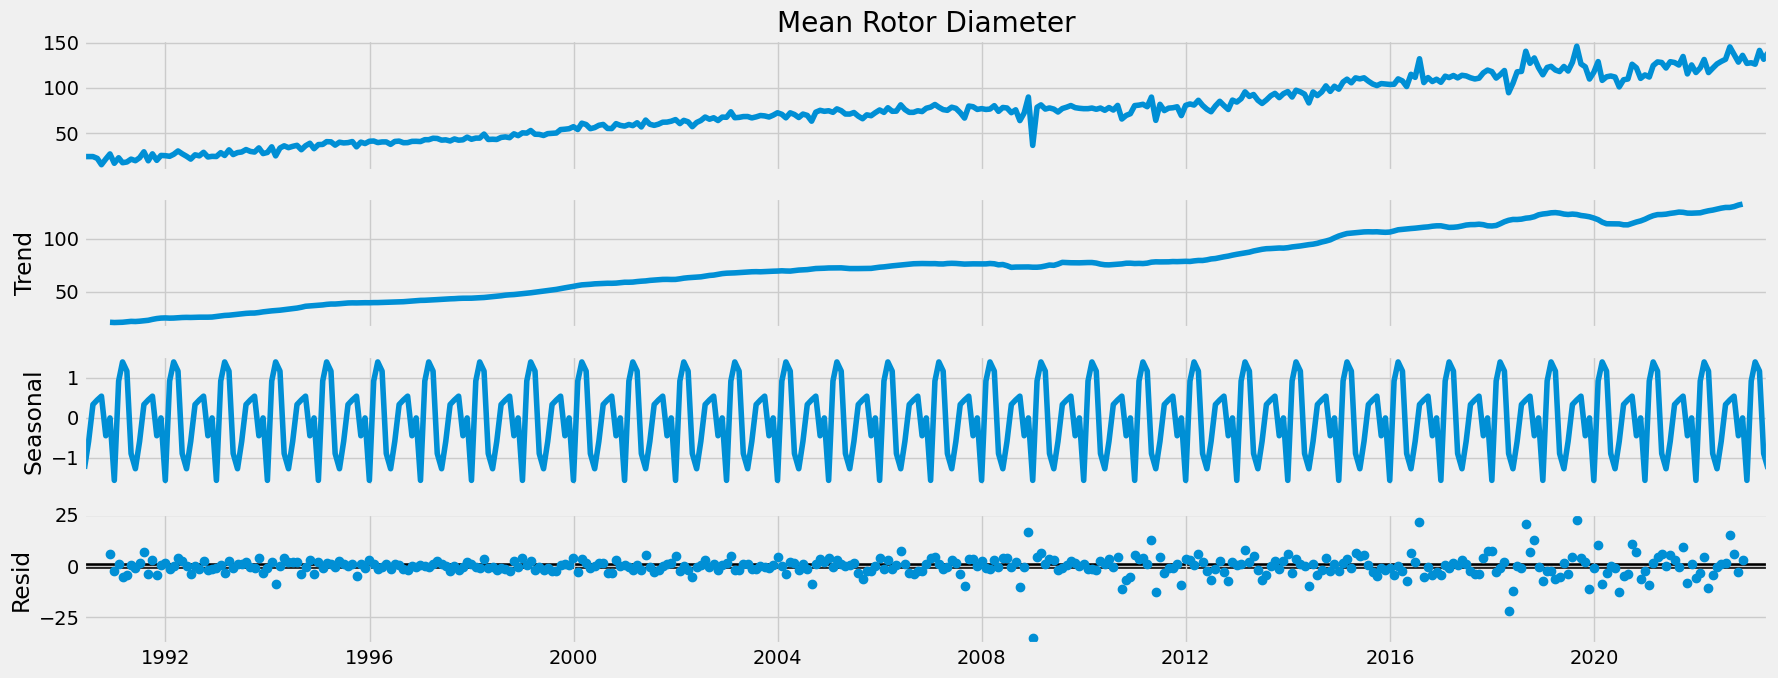

In [563]:
# Fill missing values using forward fill
df_mrd['Mean Rotor Diameter'].fillna(method='ffill', inplace=True)

# Perform the decomposition
decomposition_mrd = sm.tsa.seasonal_decompose(df_mrd['Mean Rotor Diameter'], model='additive', period=12)

# Set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition_mrd.plot()
plt.show()

### Observations

There is a clear upward trend for rotor diameter there is a very nice upward trend line.
there are some dips here and there but generally around times where there were siginifcant changes in the economy or society such as 2008 where there was a financial crash.

#### Multiplicateive Decomposition

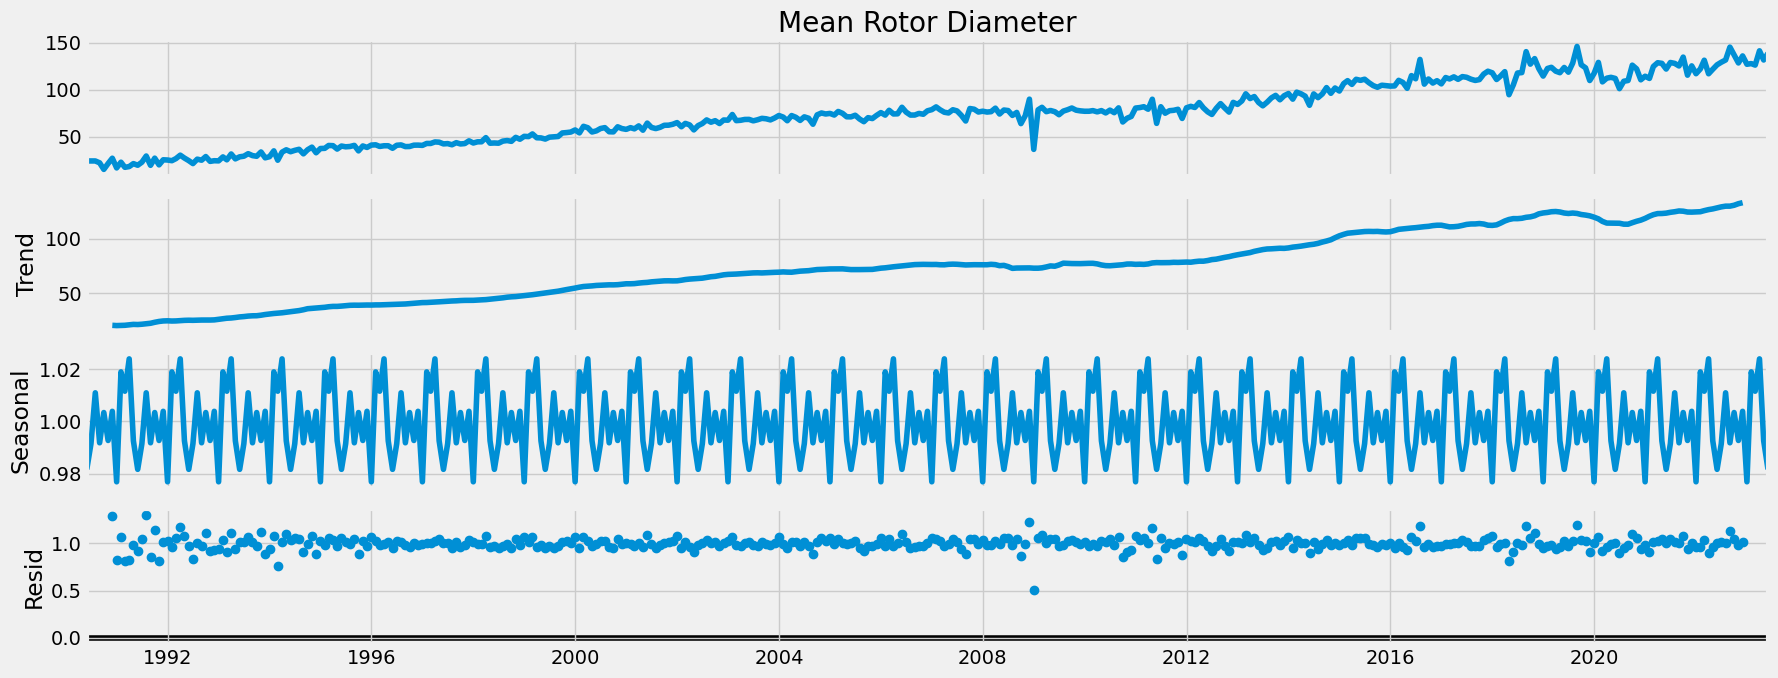

In [564]:
# Ensure all values in 'Mean Rotor Diameter' are positive by adding a small constant
df_mrd['Mean Rotor Diameter'] = df_mrd['Mean Rotor Diameter'] + 0.001

# Perform the decomposition
decomposition_mrd = sm.tsa.seasonal_decompose(df_mrd['Mean Rotor Diameter'], model='multiplicative', period=12)

# Set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition_mrd.plot()
plt.show()

## Stationarizing the Dataframe

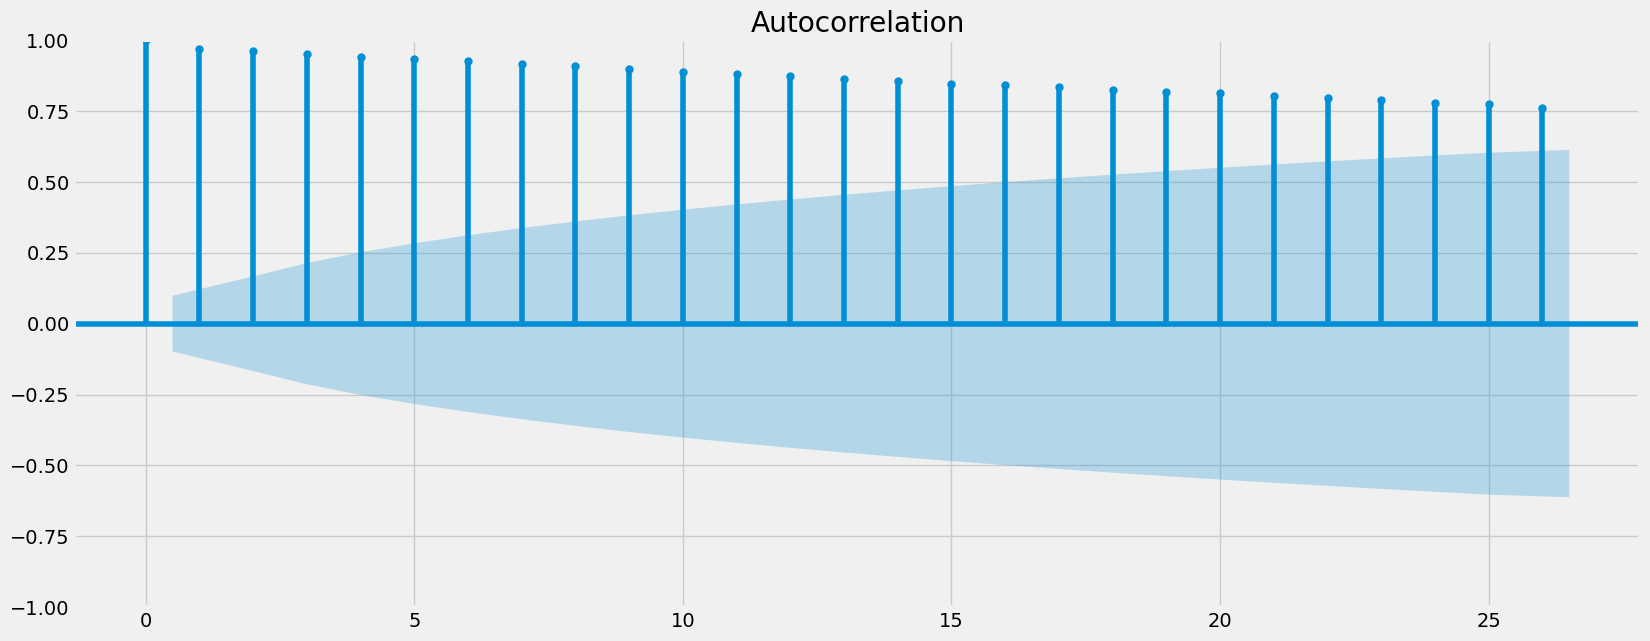

In [565]:
plot_acf(df_mrd['Mean Rotor Diameter'])
plt.show()

In [566]:
# Make the time series stationary by taking the first difference
df_mrd['Rotor Diameter_diff'] = df_mrd['Mean Rotor Diameter'].diff()

In [567]:
# Define the Dickey-Fuller function for rotor diameter
def dickey_fuller_rotor_diameter(timeseries):
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the 'Mean Rotor Diameter' time series
dickey_fuller_rotor_diameter(df_mrd['Mean Rotor Diameter'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.046843
p-value                          0.962239
Number of Lags Used             11.000000
Number of Observations Used    385.000000
Critical Value (1%)             -3.447450
Critical Value (5%)             -2.869077
Critical Value (10%)            -2.570785
dtype: float64


In [568]:
df_mrd.head()

,Mean Rotor Diameter,Rotor Diameter_diff
Commissioning Date,,
1990-05-31,24.001,NaN
1990-06-30,24.001,0.0
1990-07-31,24.001,0.0
1990-08-31,22.001,-2.0
1990-09-30,15.001,-7.0


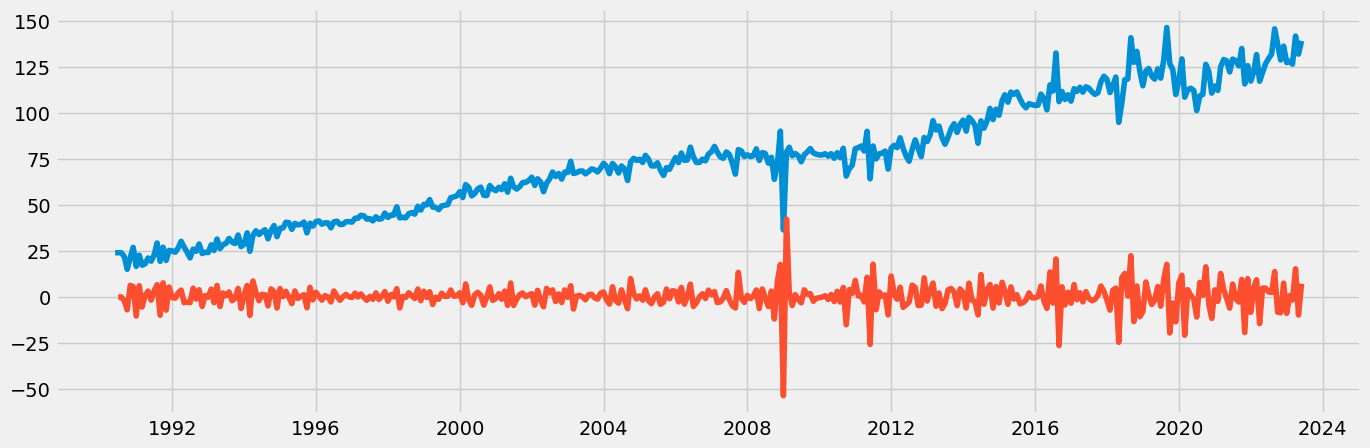

In [569]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mrd)

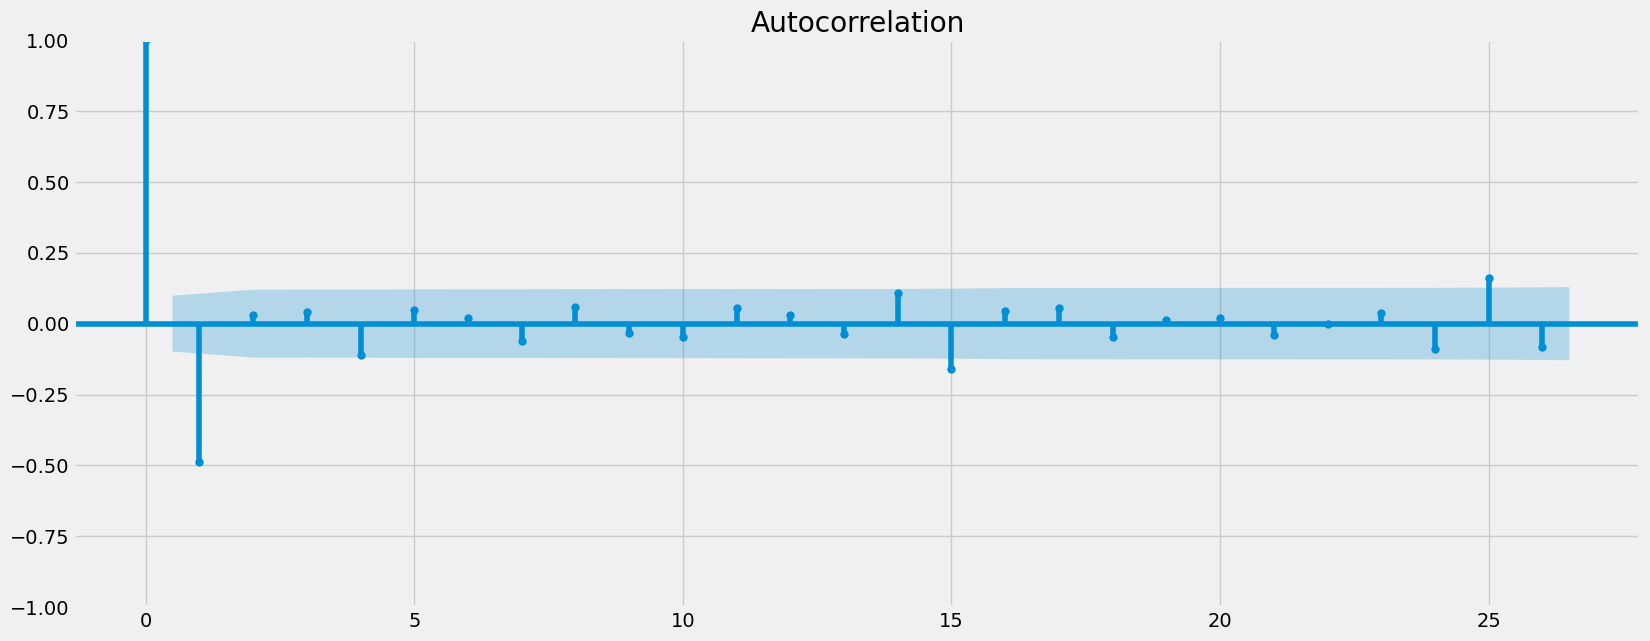

In [570]:
# Plot the autocorrelation function (ACF) for the differenced 'Rotor Diameter' series
plot_acf(df_mrd['Rotor Diameter_diff'].dropna())
plt.show()

### Observations

Dicky-Fuller test

This is the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. The null hypothesis of the test is that the time series is non-stationary. Typically, if the p-value is less than a chosen significance level (such as 0.05), you reject the null hypothesis and conclude that the time series is stationary. In this case, the p-value is approximately 0.962239, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is insufficient evidence to conclude that the time series is stationary.

Autocorrelation

-   First test, The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means the lags are significantly correlated with each other. We have many lags beyond this interval, and can deduce that this data is non-stationary.
-   Second test, thhings have improved alot here, it’s still not perfect. This means that, despite the Dickey-Fuller test saying that data is stationary, that stationarity is more acceptable but still week. there are only 4 lags that are not within the confidence area.

# Conclusion

For all the time series that we tested we can reject the null hypothese and consider the time series as non stationary. Based on the interpretation of the Dickey-Fuller test results, where the test statistic is not significantly low and the p-value is greater than common significance levels like 0.05 or 0.01, we cannot reject the null hypothesis. Therefore, we conclude that the data is likely non-stationary, indicating the presence of a trend or seasonality. The autocorrelation confirms this.